In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Q1)1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [19]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [20]:
election.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [21]:
election.shape

(1525, 9)

In [22]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [23]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [24]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [25]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [26]:
election = election.replace(replace)

In [27]:
election["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [28]:
election["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [29]:
data = election[election.duplicated()]
data.head(1525)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0
1237,0,36,3,3,2,2,6,2,0
1245,0,29,4,4,4,2,2,2,0
1439,0,40,4,3,4,2,2,2,1


In [30]:
election.skew()

vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

# Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

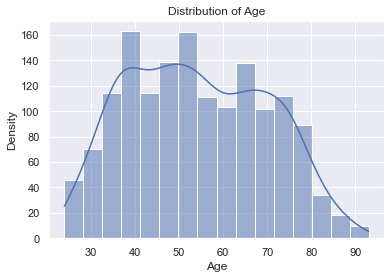

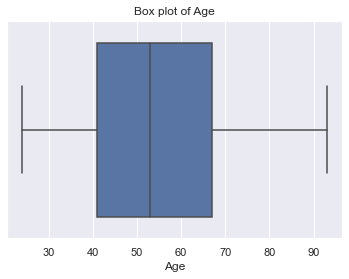

Skewness of Age:
0.14462077228942483

Observations:
- The data is normally distributed.
- Maximum number of people are aged between 40 and 70.
- Outliers are not present.
- The minimum value is 24 and the maximum value is 93.
- The mean value is 54.182295


In [134]:
import seaborn as sns

# Create a histogram of the 'age' column with density plot
sns.histplot(election['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Create a box plot of the 'age' column
sns.boxplot(election['age'])
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

# Print skewness of 'age'
print("Skewness of Age:")
print(election['age'].skew())

# Your observations
print("\nObservations:")
print("- The data is normally distributed.")
print("- Maximum number of people are aged between 40 and 70.")
print("- Outliers are not present.")
print("- The minimum value is 24 and the maximum value is 93.")
print("- The mean value is", round(election['age'].mean(), 6))


In [135]:
import pandas as pd

# Read in the dataset
election = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

# Check for missing values in the 'age' column
if election['age'].isnull().sum() > 0:
    print("There are missing values in the 'age' column.")
else:
    print("There are no missing values in the 'age' column.")

There are no missing values in the 'age' column.


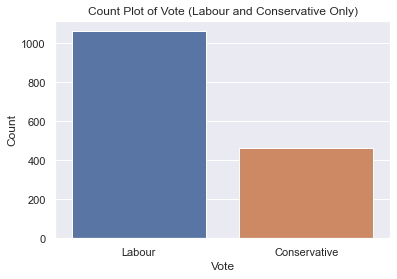

In [136]:
import seaborn as sns

# Create a count plot of the 'vote' column, filtered by Labour and Conservative
sns.countplot(data=election[election['vote'].isin(['Labour', 'Conservative'])], x='vote')
plt.title('Count Plot of Vote (Labour and Conservative Only)')
plt.xlabel('Vote')
plt.ylabel('Count')
plt.show()

In [137]:
print(election['vote'].value_counts())

Labour          1063
Conservative     462
Name: vote, dtype: int64


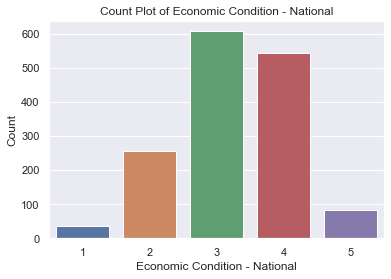

In [138]:
# Create a count plot of the 'economic.cond.national' column
sns.countplot(x='economic.cond.national', data=election)

# Add labels to the plot
plt.title('Count Plot of Economic Condition - National')
plt.xlabel('Economic Condition - National')
plt.ylabel('Count')

# Show the plot
plt.show()


In [139]:
# Read in the dataset
election = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

# Display the value counts for the 'economic.cond.national' column
print(election['economic.cond.national'].value_counts())

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


In [140]:
# Calculate the mean of the 'economic.cond.national' column
mean_econ_cond = election['economic.cond.national'].mean()

# Print the mean
print("Mean of 'economic.cond.national':", mean_econ_cond)

Mean of 'economic.cond.national': 3.2459016393442623


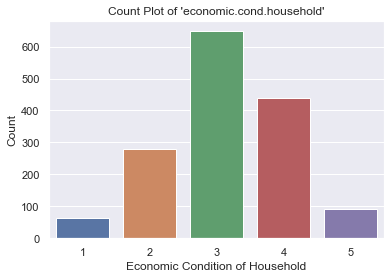

In [141]:
# Create a count plot of 'economic.cond.household'
sns.countplot(x='economic.cond.household', data=election)

# Add labels
plt.title("Count Plot of 'economic.cond.household'")
plt.xlabel('Economic Condition of Household')
plt.ylabel('Count')

# Show the plot
plt.show()

In [142]:
# View the value counts of the 'economic.cond.household' column
print(election['economic.cond.household'].value_counts())

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


In [143]:
# Calculate the mean of the 'economic.cond.household' column
mean_econ_cond_household = election['economic.cond.household'].astype('category').cat.codes.mean()

# Print the mean
print('Mean of "economic.cond.household":', mean_econ_cond_household)

Mean of "economic.cond.household": 2.140327868852459


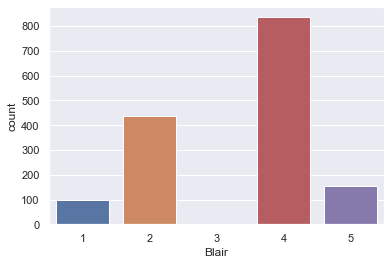

In [144]:
# Create the count plot
sns.countplot(x='Blair', data=election)

# Show the plot
plt.show()

In [145]:
# View the exact values of the 'Blair' column
print(election['Blair'].value_counts())


4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


In [146]:
# Calculate the mean of the 'Blair' column
blair_mean = election['Blair'].mean()

# Print the mean value
print('Mean of Blair:', blair_mean)


Mean of Blair: 3.3344262295081966


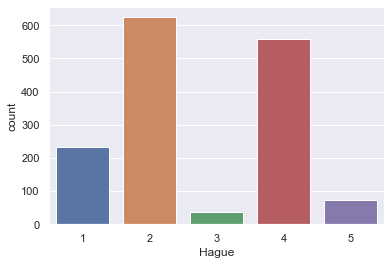

In [147]:
# Create the count plot
sns.countplot(x='Hague', data=election)

# Show the plot
plt.show()

In [148]:
# View the value counts for the 'Hague' column
print(election['Hague'].value_counts())

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


In [149]:
# Calculate the mean of the 'Hague' column
mean_hague = election['Hague'].mean()

# Print the mean value
print('Mean of Hague column:', mean_hague)

Mean of Hague column: 2.7468852459016393


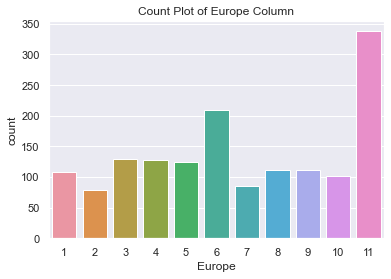

In [150]:
# Create a count plot of the 'Europe' column
sns.countplot(data=election, x='Europe')

# Add a title to the plot
plt.title('Count Plot of Europe Column')

# Show the plot
plt.show()


In [151]:
print(election['Europe'].value_counts())

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


In [152]:
europe_mean = election['Europe'].mean()
print("Mean of 'Europe': ", europe_mean)

Mean of 'Europe':  6.728524590163935


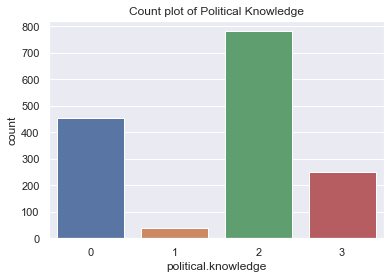

In [153]:
sns.countplot(x='political.knowledge', data=election)
plt.title('Count plot of Political Knowledge')
plt.show()

In [154]:
election['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [155]:
mean_pol_knowledge = election['political.knowledge'].mean()
print('Mean of political.knowledge:', mean_pol_knowledge)

Mean of political.knowledge: 1.5422950819672132


<AxesSubplot:xlabel='vote', ylabel='age'>

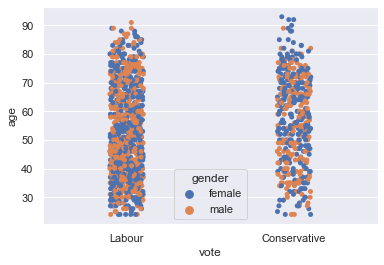

In [157]:
import seaborn as sns

sns.stripplot(x='vote', y='age', hue='gender', data=election)

In [158]:
vote_by_gender = election.groupby('vote')['gender'].value_counts()
print(vote_by_gender)

vote          gender
Conservative  female    259
              male      203
Labour        female    553
              male      510
Name: gender, dtype: int64


<AxesSubplot:xlabel='vote', ylabel='economic.cond.national'>

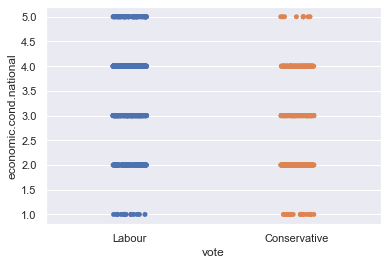

In [159]:
import seaborn as sns

sns.stripplot(x='vote', y='economic.cond.national', data=election)

<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

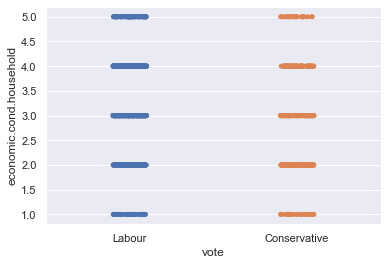

In [160]:
sns.stripplot(x="vote", y="economic.cond.household", data=election)

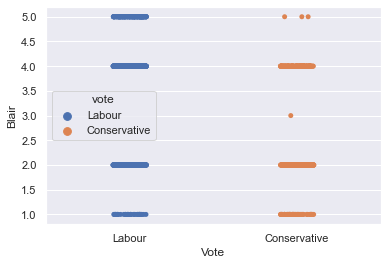

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for Labour and Conservative voters
labour = election[election['vote'] == 'Labour']
conservative = election[election['vote'] == 'Conservative']

# Create the strip plot
sns.stripplot(x='vote', y='Blair', hue='vote', data=election[election['vote'].isin(['Labour', 'Conservative'])])

# Set the x and y-axis labels
plt.xlabel('Vote')
plt.ylabel('Blair')

# Show the plot
plt.show()

<AxesSubplot:xlabel='vote', ylabel='Hague'>

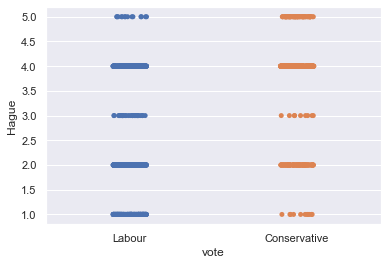

In [167]:
import seaborn as sns

sns.stripplot(x='vote', y='Hague', data=election)

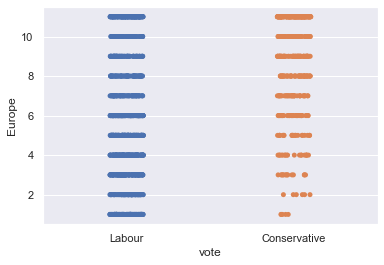

In [163]:
sns.stripplot(x="vote", y="Europe", data=election)
plt.show()

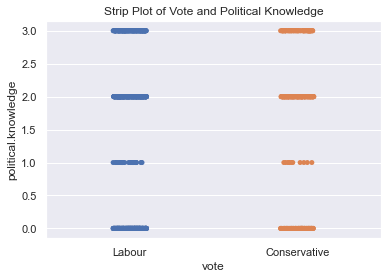

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(x='vote', y='political.knowledge', data=election)
plt.title("Strip Plot of Vote and Political Knowledge")
plt.show()

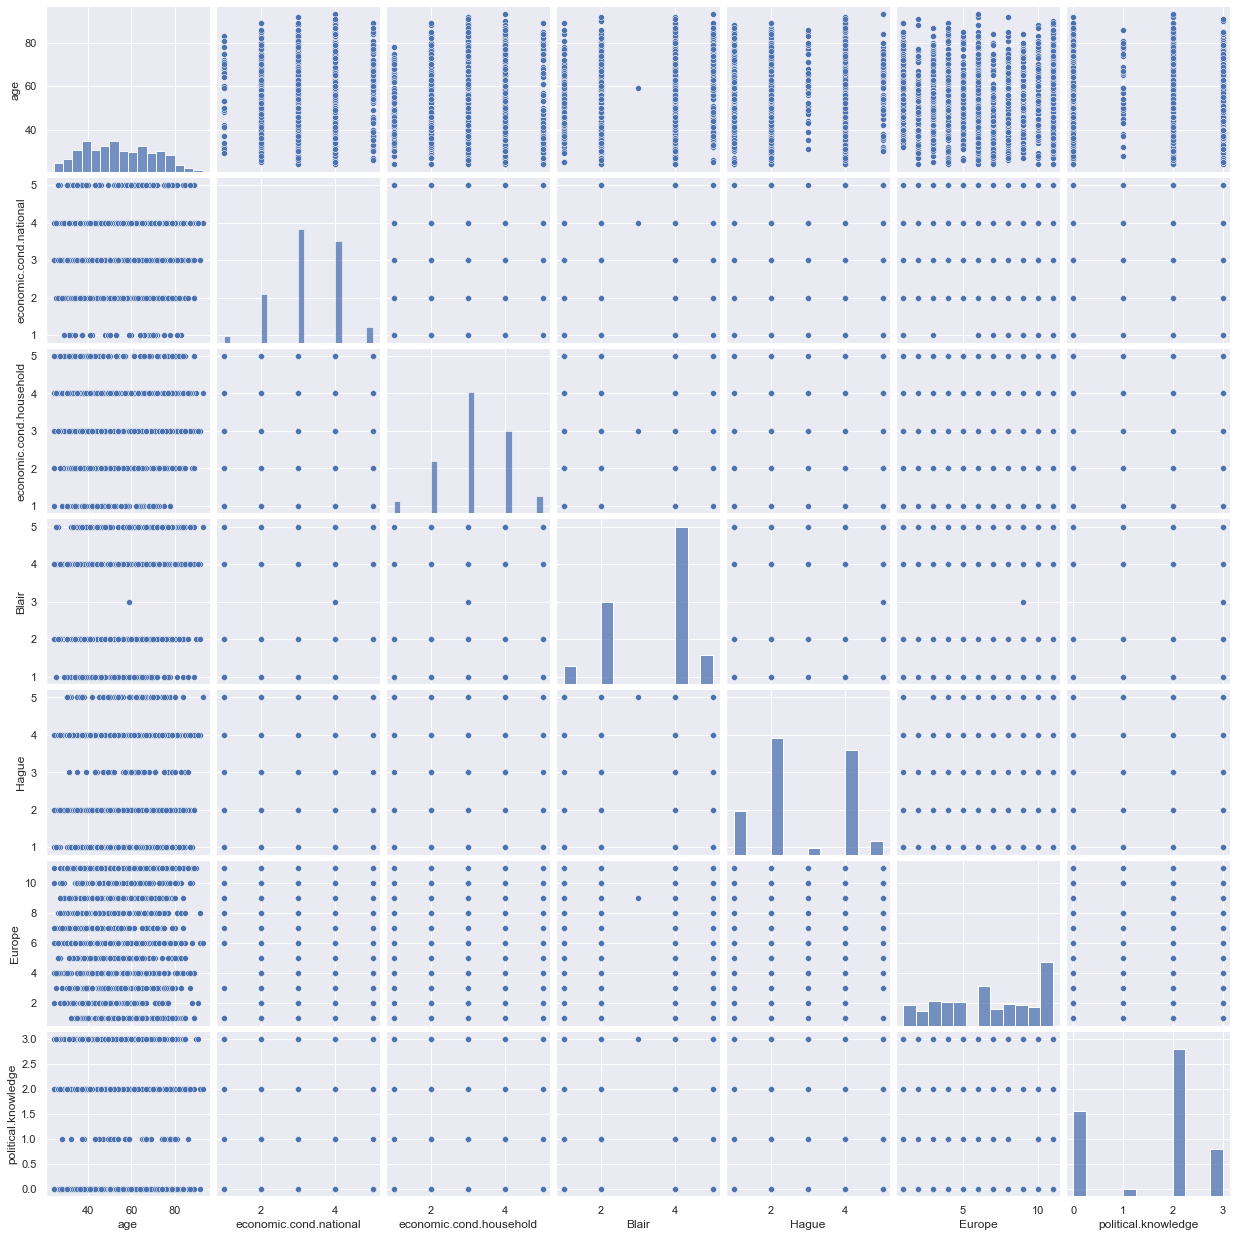

In [165]:
import seaborn as sns

# Selecting only the continuous variables
continuous_vars = election[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]

# Creating the scatterplot matrix
sns.pairplot(continuous_vars)

<AxesSubplot:>

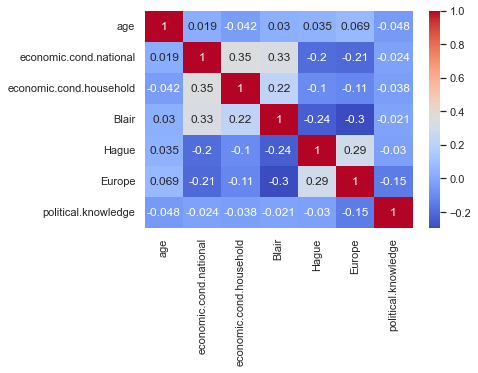

In [166]:
import seaborn as sns

# Select only the continuous variables
continuous_vars = ['age', 'economic.cond.national', 'economic.cond.household',
                   'Blair', 'Hague', 'Europe', 'political.knowledge']

# Create a correlation matrix
corr_matrix = election[continuous_vars].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

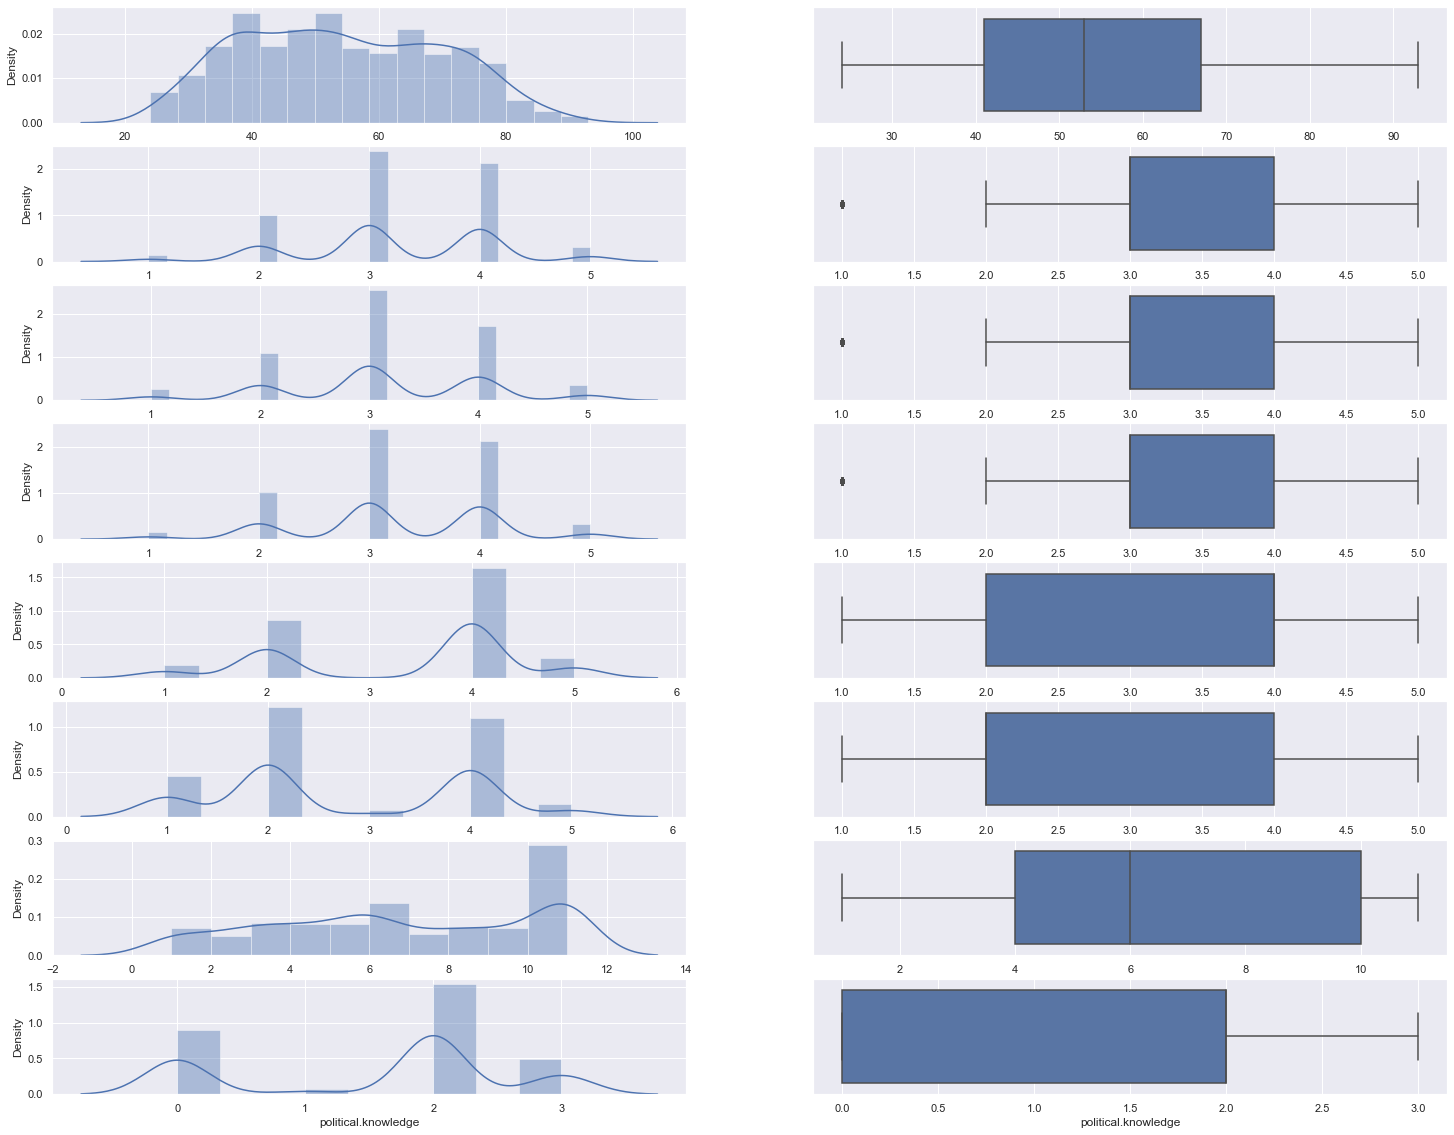

In [31]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[3][1])
sns.distplot(election['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election, ax=axes[4][1])
sns.distplot(election['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election , ax=axes[5][1])
sns.distplot(election['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election , ax=axes[6][1])
sns.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election, ax=axes[7][1])
plt.show()

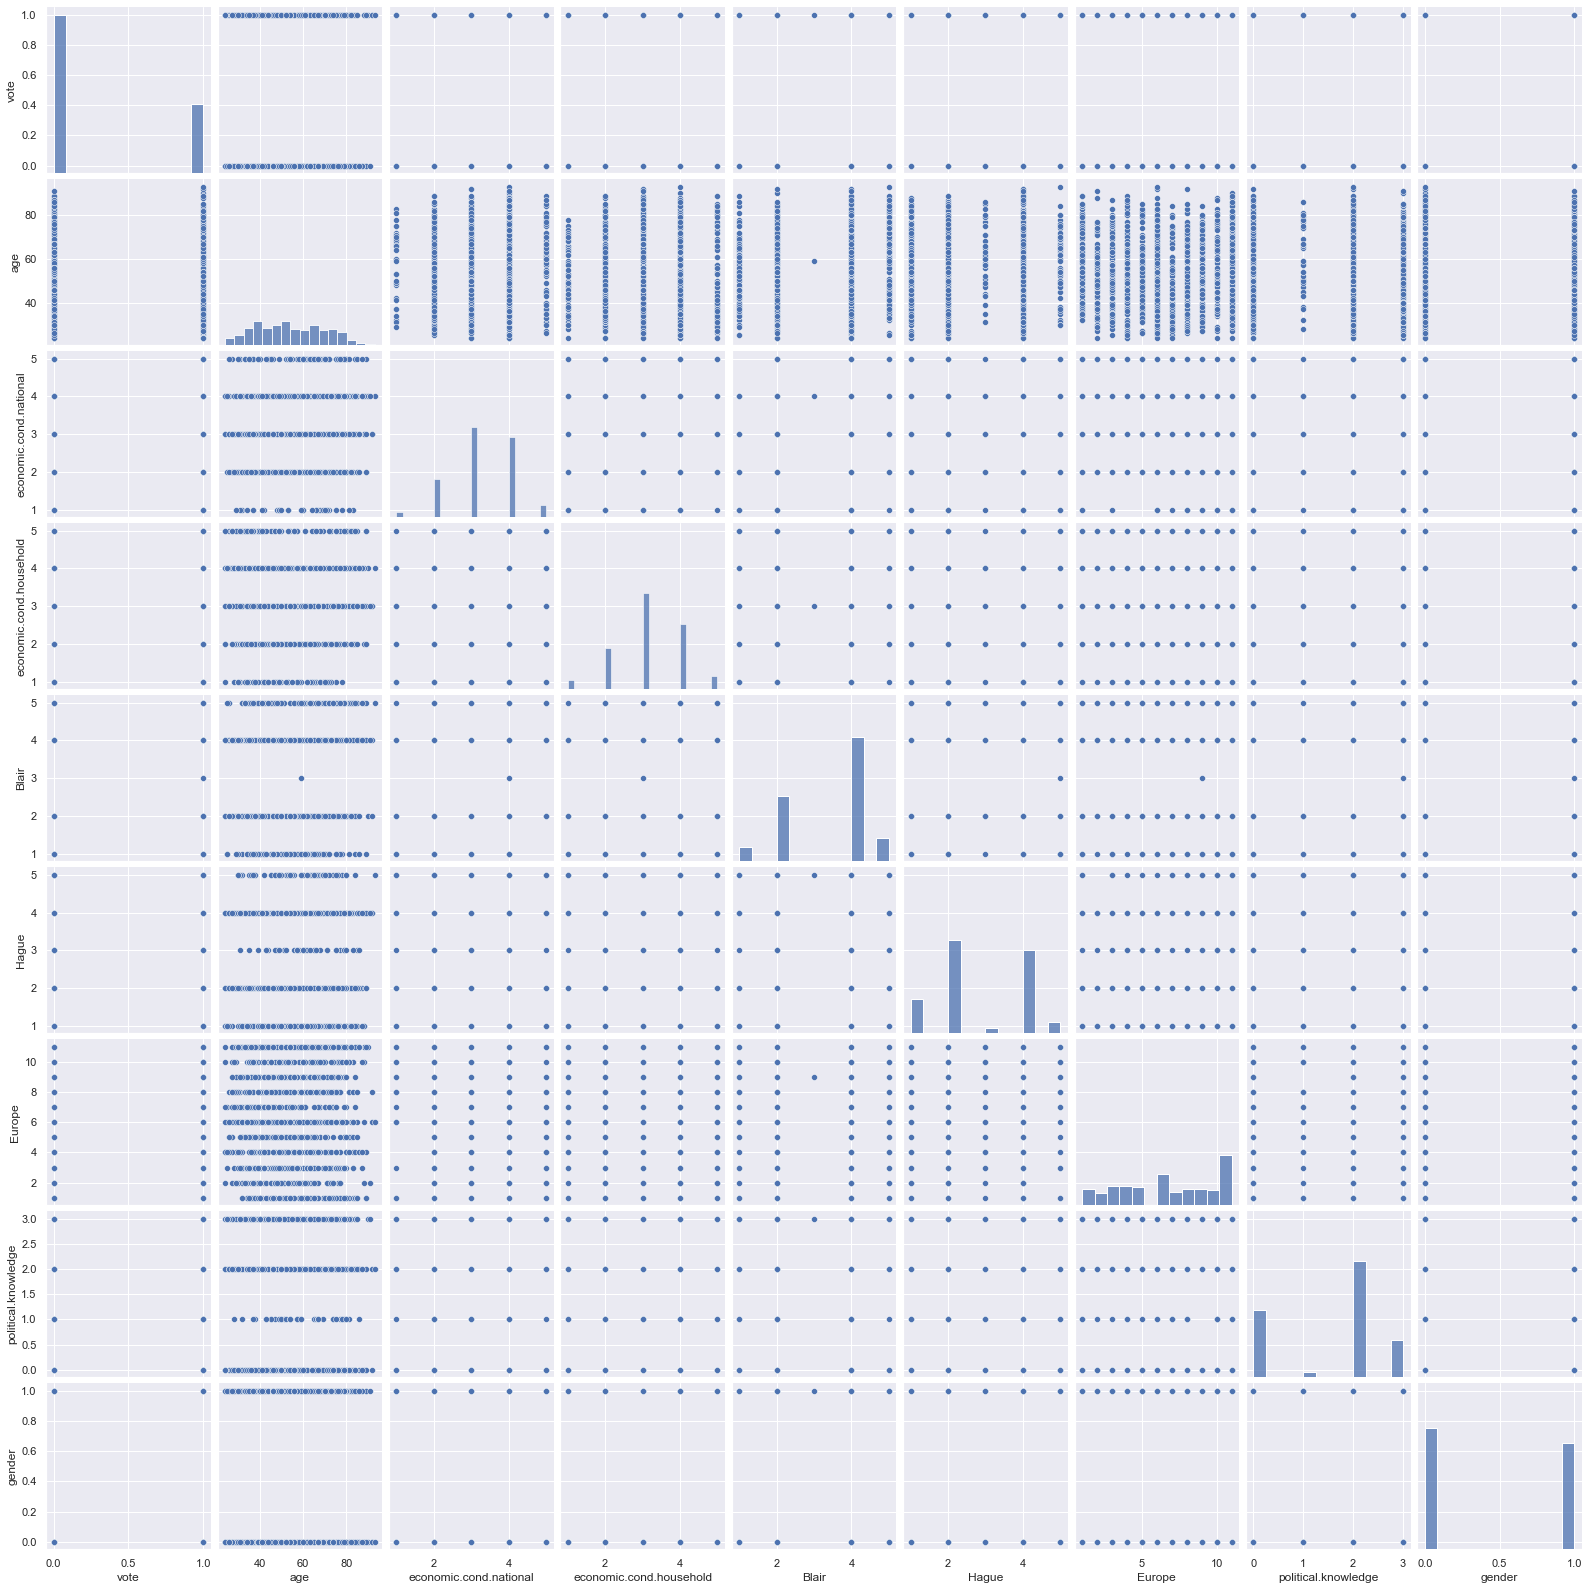

In [32]:
sns.pairplot(election)

<AxesSubplot:xlabel='Hague', ylabel='age'>

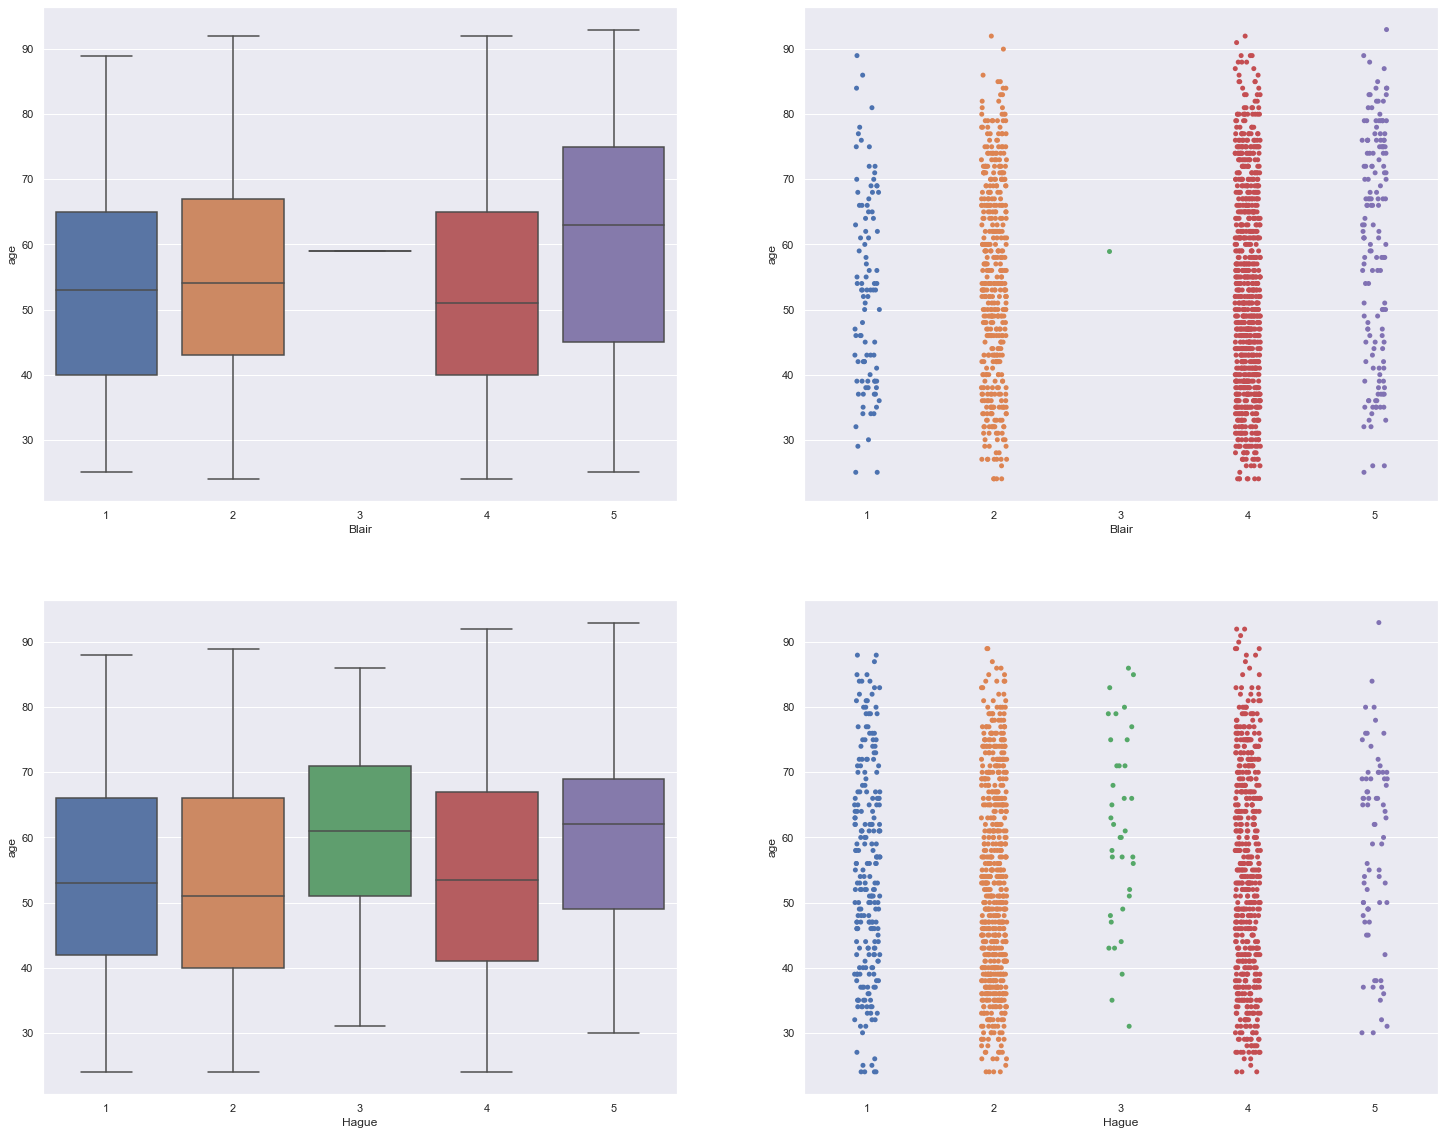

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(election["Blair"],election["age"], ax = axes[0][0])
sns.stripplot(election["Blair"],election["age"], ax = axes[0][1])
sns.boxplot(election["Hague"],election["age"], ax = axes[1][0])
sns.stripplot(election["Hague"],election["age"], ax = axes[1][1])

<AxesSubplot:xlabel='Blair', ylabel='Count'>

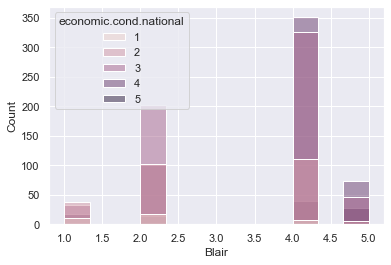

In [42]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

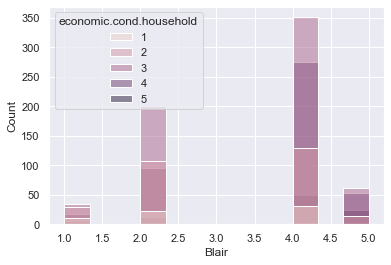

In [34]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

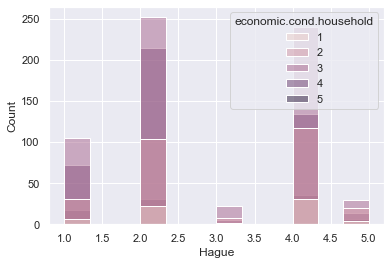

In [35]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

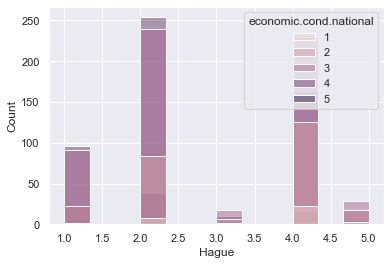

In [36]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

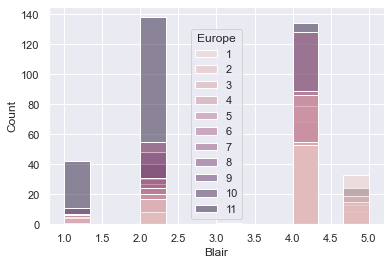

In [37]:
sns.histplot(data =election , x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

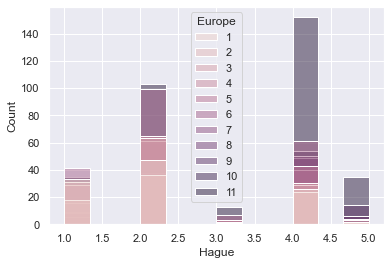

In [38]:
sns.histplot(data =election , x = "Hague", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

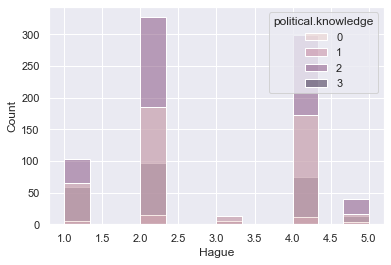

In [39]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

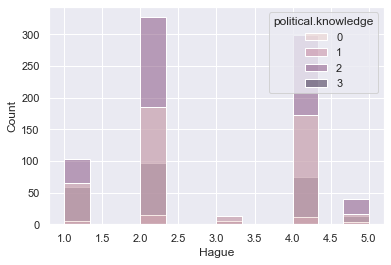

In [40]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

In [41]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


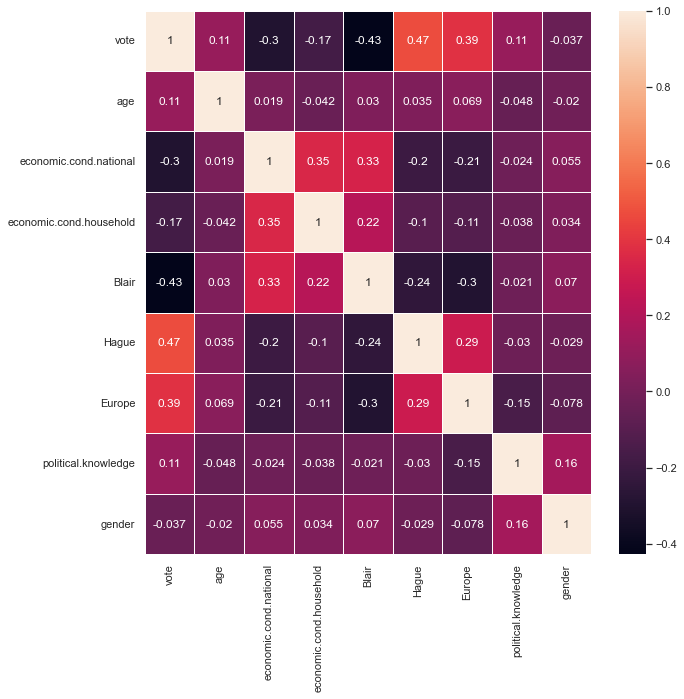

In [44]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

# Q3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [46]:
#from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [49]:
#x = np.linspace(0, 2*np.pi, 8)
#y = np.sin(x) + np.random.normal(0, 0.4, 8)

In [50]:
#x = x.reshape(-1, 1)

In [51]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [54]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [55]:
y_train_predict=lr.predict(x_train)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



AxesSubplot(0.125,0.125;0.62x0.755)


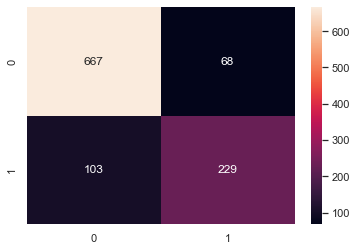

In [58]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [59]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [60]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [61]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


In [62]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


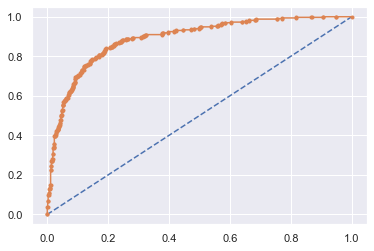

In [63]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.882


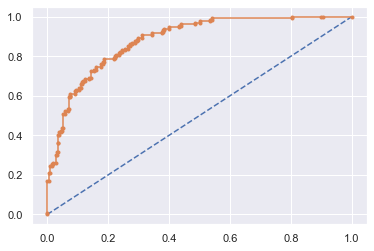

In [64]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Linear Discriminant Analysis

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
lda = LinearDiscriminantAnalysis()

In [67]:
lda = lda.fit(x_train,y_train)

In [68]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[660  99]
 [ 75 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [69]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[289  44]
 [ 39  86]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


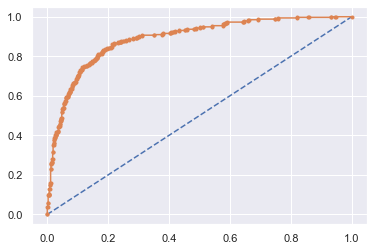

In [70]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


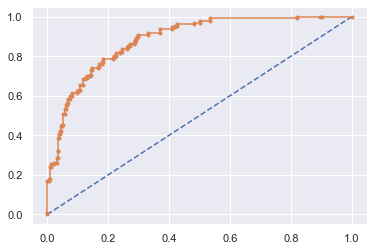

In [71]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q5)Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [74]:
knn = knn.fit(x_train,y_train)

In [75]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.7860262008733624

In [76]:
print(confusion_matrix(knn.predict(x_train),y_train))

[[673  86]
 [ 62 246]]


In [77]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.924


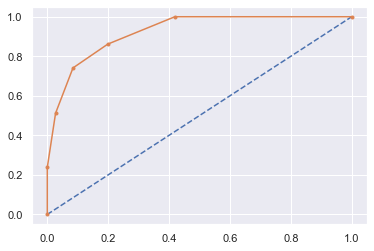

In [78]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.832


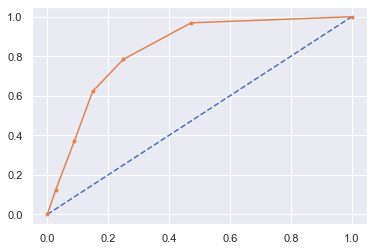

In [79]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# naive bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb=GaussianNB()

In [85]:
nb= nb.fit(x_train, y_train)

In [86]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [87]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[284  36]
 [ 44  94]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.72      0.68      0.70       138

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.886


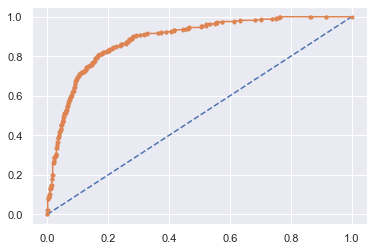

In [89]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.885


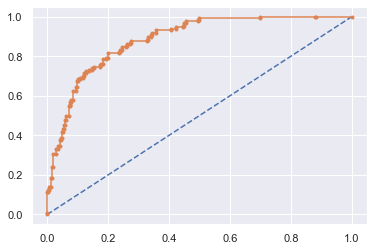

In [90]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [93]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [97]:
ADB_model=AdaBoostClassifier()

In [98]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [105]:
ADB_model=grid_search.best_estimator_

In [106]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

In [107]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8350515463917526
[[674  61]
 [115 217]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.78      0.65      0.71       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AUC: 0.902


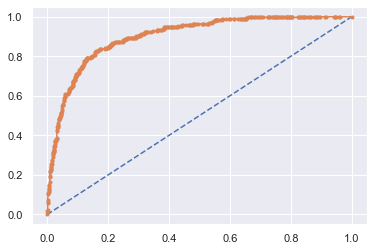

In [108]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [109]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8318777292576419
[[296  32]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.73      0.65      0.69       130

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.893


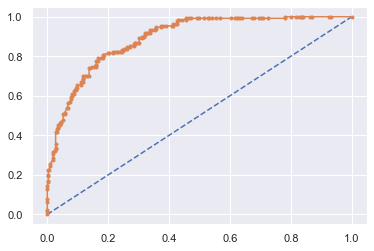

In [110]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# decision tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [113]:
DT_model= DecisionTreeClassifier()

In [114]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [115]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [116]:
DT_model=grid_search.best_estimator_

In [117]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [118]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[663  72]
 [101 231]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.896


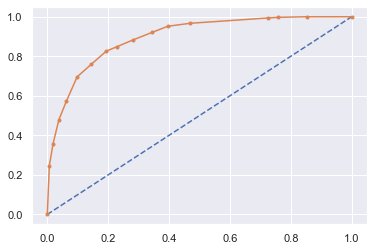

In [119]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [120]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[285  43]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.870


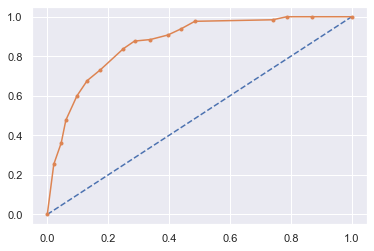

In [121]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [16]:
RF_model=RandomForestClassifier()

In [125]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [126]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [127]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [128]:
RF_model=grid_search.best_estimator_

In [129]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [130]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8388003748828491
[[687  48]
 [124 208]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       735
           1       0.81      0.63      0.71       332

    accuracy                           0.84      1067
   macro avg       0.83      0.78      0.80      1067
weighted avg       0.84      0.84      0.83      1067



AUC: 0.906


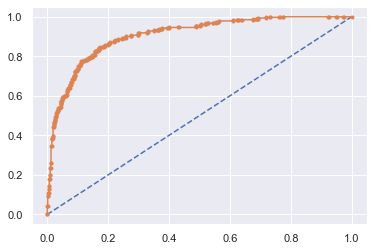

In [131]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [132]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.834061135371179
[[300  28]
 [ 48  82]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       328
           1       0.75      0.63      0.68       130

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.79       458
weighted avg       0.83      0.83      0.83       458



In [17]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

NameError: name 'x_test' is not defined

In [6]:
df= pd.read_excel("Project_Speech.xlsx")

In [10]:
import nltk
nltk.download('inaugural') # download the inaugural corpus
from nltk.corpus import inaugural

# get the raw text of each speech
fd_roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
jf_kennedy_raw = inaugural.raw('1961-Kennedy.txt')
rnixon_raw = inaugural.raw('1973-Nixon.txt')

# get the number of characters in each speech
fd_roosevelt_chars = len(fd_roosevelt_raw)
jf_kennedy_chars = len(jf_kennedy_raw)
rnixon_chars = len(rnixon_raw)

# get the number of words in each speech
fd_roosevelt_words = len(inaugural.words('1941-Roosevelt.txt'))
jf_kennedy_words = len(inaugural.words('1961-Kennedy.txt'))
rnixon_words = len(inaugural.words('1973-Nixon.txt'))

# get the number of sentences in each speech
fd_roosevelt_sents = len(inaugural.sents('1941-Roosevelt.txt'))
jf_kennedy_sents = len(inaugural.sents('1961-Kennedy.txt'))
rnixon_sents = len(inaugural.sents('1973-Nixon.txt'))

# print the results
print("Speech\t\t\tCharacters\tWords\tSentences")
print("-------------------------------------------------------")
print("FD Roosevelt\t\t{}\t{}\t{}".format(fd_roosevelt_chars, fd_roosevelt_words, fd_roosevelt_sents))
print("JF Kennedy\t\t{}\t{}\t{}".format(jf_kennedy_chars, jf_kennedy_words, jf_kennedy_sents))
print("Richard Nixon\t\t{}\t{}\t{}".format(rnixon_chars, rnixon_words, rnixon_sents))

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


Speech			Characters	Words	Sentences
-------------------------------------------------------
FD Roosevelt		7571	1536	68
JF Kennedy		7618	1546	52
Richard Nixon		9991	2028	69


In [11]:
import nltk
nltk.download('stopwords')

from nltk.corpus import inaugural
from nltk.corpus import stopwords

# get the raw text of each speech
fd_roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
jf_kennedy_raw = inaugural.raw('1961-Kennedy.txt')
rnixon_raw = inaugural.raw('1973-Nixon.txt')

# get the list of stopwords
stop_words = set(stopwords.words('english'))

# remove stopwords from each speech
fd_roosevelt_words = [word for word in inaugural.words('1941-Roosevelt.txt') if word.lower() not in stop_words]
jf_kennedy_words = [word for word in inaugural.words('1961-Kennedy.txt') if word.lower() not in stop_words]
rnixon_words = [word for word in inaugural.words('1973-Nixon.txt') if word.lower() not in stop_words]

# get the number of words before and after removal of stopwords
fd_roosevelt_words_before = len(inaugural.words('1941-Roosevelt.txt'))
jf_kennedy_words_before = len(inaugural.words('1961-Kennedy.txt'))
rnixon_words_before = len(inaugural.words('1973-Nixon.txt'))

fd_roosevelt_words_after = len(fd_roosevelt_words)
jf_kennedy_words_after = len(jf_kennedy_words)
rnixon_words_after = len(rnixon_words)

# print the results
print("Speech\t\tWords before\tWords after")
print("-------------------------------------------------------")
print("FD Roosevelt\t{}\t\t{}".format(fd_roosevelt_words_before, fd_roosevelt_words_after))
print("JF Kennedy\t{}\t\t{}".format(jf_kennedy_words_before, jf_kennedy_words_after))
print("Richard Nixon\t{}\t\t{}".format(rnixon_words_before, rnixon_words_after))

# show a sample sentence after the removal of stopwords
fd_roosevelt_sample = ' '.join(fd_roosevelt_words[:20])
print("Sample sentence after removal of stopwords:\n", fd_roosevelt_sample)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...


Speech		Words before	Words after
-------------------------------------------------------
FD Roosevelt	1536		817
JF Kennedy	1546		871
Richard Nixon	2028		1044
Sample sentence after removal of stopwords:
 national day inauguration since 1789 , people renewed sense dedication United States . Washington ' day task people create weld


[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# create a set of stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# remove the stopwords from each speech
fd_roosevelt_words_no_stop = [word for word in inaugural.words('1941-Roosevelt.txt') if word.lower() not in stop_words]
jf_kennedy_words_no_stop = [word for word in inaugural.words('1961-Kennedy.txt') if word.lower() not in stop_words]
rnixon_words_no_stop = [word for word in inaugural.words('1973-Nixon.txt') if word.lower() not in stop_words]

# count the occurrences of each word after removing the stopwords
fd_roosevelt_freq = nltk.FreqDist(fd_roosevelt_words_no_stop)
jf_kennedy_freq = nltk.FreqDist(jf_kennedy_words_no_stop)
rnixon_freq = nltk.FreqDist(rnixon_words_no_stop)

# find the most common words for each president
fd_roosevelt_top_words = fd_roosevelt_freq.most_common(3)
jf_kennedy_top_words = jf_kennedy_freq.most_common(3)
rnixon_top_words = rnixon_freq.most_common(3)

# print the results
print("President Franklin D. Roosevelt")
for word, freq in fd_roosevelt_top_words:
    print(f"{word}: {freq}")
    
print("\nPresident John F. Kennedy")
for word, freq in jf_kennedy_top_words:
    print(f"{word}: {freq}")
    
print("\nPresident Richard Nixon")
for word, freq in rnixon_top_words:
    print(f"{word}: {freq}")

President Franklin D. Roosevelt
,: 77
.: 67
--: 25

President John F. Kennedy
,: 85
.: 51
--: 25

President Richard Nixon
,: 96
.: 68
us: 26


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


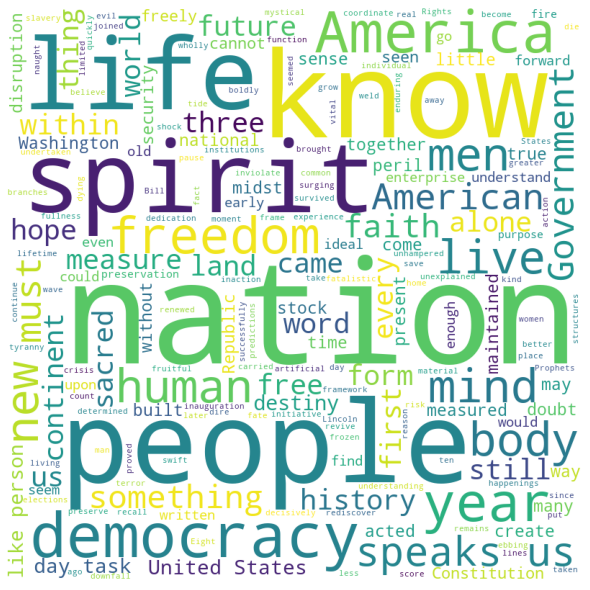

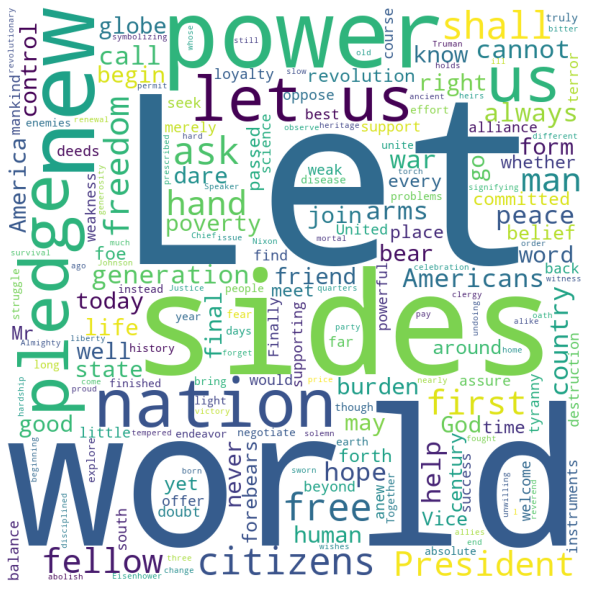

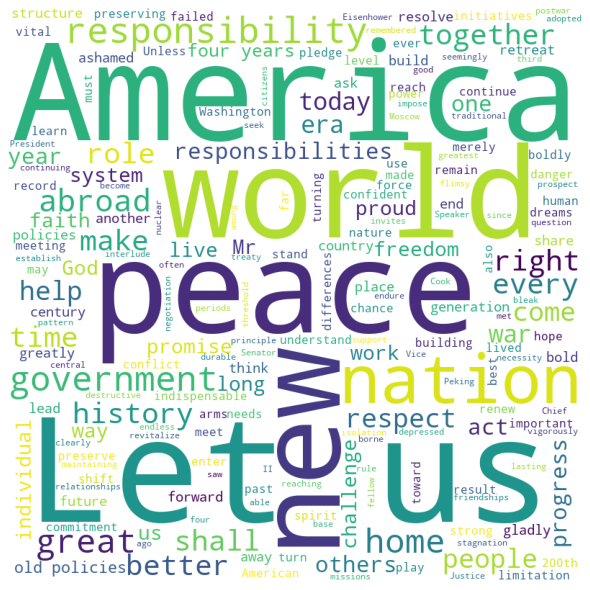

In [18]:
# import the necessary packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a function to generate and plot the word cloud for a given text
def plot_wordcloud(text):
    # generate the word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(text) 
     
    # plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
     
    # show the plot
    plt.show() 

# generate and plot the word cloud for each speech
plot_wordcloud(' '.join(fd_roosevelt_words_no_stop))
plot_wordcloud(' '.join(jf_kennedy_words_no_stop))
plot_wordcloud(' '.join(rnixon_words_no_stop))